# KNN Preprocessing

## Reading the data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

data = pd.read_csv('bank-additional-full.csv', sep=',', na_values='.')
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [2]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39186,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
39187,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
39188,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
39189,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Study of column age
It looks kinda suspicious as it has some outlier data, but these outliers are not too significant. We may leave them here.

421


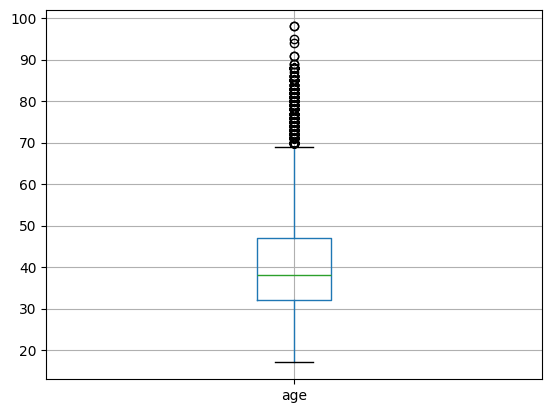

In [3]:
data.boxplot(column=['age'])
print(len(data[data.age > 69]))

In [4]:
age = data[data.age>data.age.mean()+3*data.age.std()]
print(len(age))
print(age.min())

378
age                     71
job                 admin.
marital           divorced
education         basic.4y
default                 no
housing                 no
loan                    no
contact           cellular
month                  apr
day_of_week            fri
duration                 1
campaign                 1
pdays                    2
previous                 0
poutcome           failure
emp.var.rate          -3.4
cons.price.idx      92.201
cons.conf.idx        -50.8
euribor3m            0.635
nr.employed         4963.6
y                       no
dtype: object


## Study of column pdays
For reference, pdays represents the number of days that a client was contacted previously before this campaign. If the value is 999, it means that they were not contacted before.
We will ditch out the column pdays and make a new column, consisting of only Booleans for two reasons:
1. The number of rows with pdays == 999 are high, thus it might make the calculation dirty.
2. Most of the people that were previously contacted were before 10 days, we can assume that this time is short enough to consider that they were contacted.

37792
[[<Axes: title={'center': 'pdays'}>]]
[[<Axes: title={'center': 'pdays'}>]]


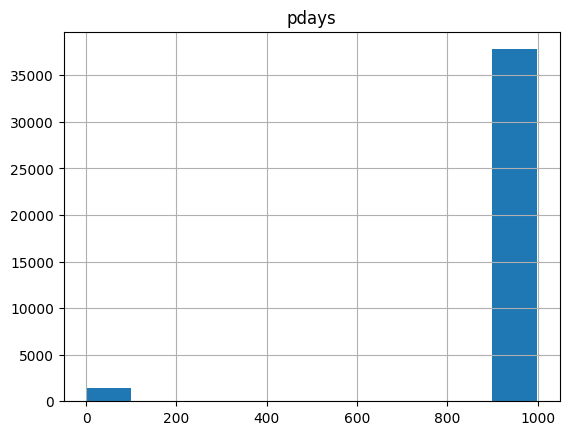

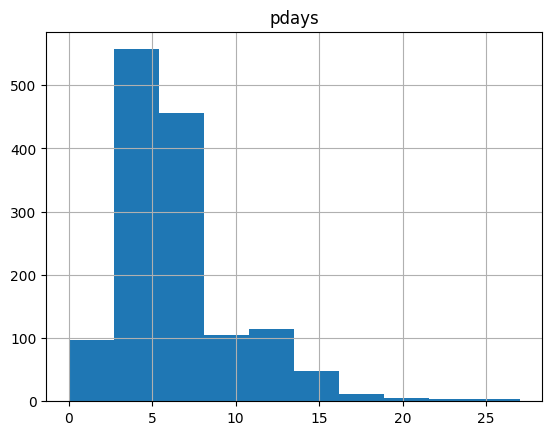

In [5]:
print(len(data[data.pdays == 999]))
print(data.hist(column=['pdays']))
print(data[data.pdays<999].hist(column=['pdays']))

In [6]:
# Constructing new column
data["was_contacted"] = np.where(data["pdays"] < 100, True, False)
data.drop(['pdays'], axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,was_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39186,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,False
39187,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,False
39188,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,False
39189,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,False


In [7]:
print('Number of rows with pdays < 100: %d' % (len(data[data.pdays < 100])))
print('Number of rows with was_contacted == True: %d' % (len(data[data.was_contacted == True])))

Number of rows with pdays < 100: 1399
Number of rows with was_contacted == True: 1399


## Correlation and serialization

In [8]:
# Correlation with only the numeric values we have so far...
data.corr(method='pearson', numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,was_contacted
age,1.000000,0.001546,0.005474,-0.037743,0.027838,-0.003012,-0.001125,0.127213,0.008171,-0.020498,0.037679
duration,0.001546,1.000000,-0.071362,-0.044164,0.017368,-0.026115,0.006358,-0.008078,-0.030544,-0.042354,0.044217
campaign,0.005474,-0.071362,1.000000,0.051724,-0.078178,0.149993,0.127493,-0.010179,0.134084,0.142450,-0.051714
pdays,-0.037743,-0.044164,0.051724,1.000000,-0.581879,0.268314,0.079847,-0.089746,0.291988,0.367341,-0.999993
previous,0.027838,0.017368,-0.078178,-0.581879,1.000000,-0.419781,-0.207791,-0.057177,-0.451472,-0.496183,0.581820
emp.var.rate,-0.003012,-0.026115,0.149993,0.268314,-0.419781,1.000000,0.775741,0.211027,0.972417,0.907748,-0.268260
cons.price.idx,-0.001125,0.006358,0.127493,0.079847,-0.207791,0.775741,1.000000,0.070075,0.689978,0.524660,-0.079685
cons.conf.idx,0.127213,-0.008078,-0.010179,-0.089746,-0.057177,0.211027,0.070075,1.000000,0.291929,0.114673,0.089663
euribor3m,0.008171,-0.030544,0.134084,0.291988,-0.451472,0.972417,0.689978,0.291929,1.000000,0.945250,-0.292009
nr.employed,-0.020498,-0.042354,0.142450,0.367341,-0.496183,0.907748,0.524660,0.114673,0.945250,1.000000,-0.367416


In [9]:
# Transform the y column into Boolean
data.y = pd.Series(np.where(data.y.values == 'yes', True, False), data.index)

In [10]:
# Separate categorical columns into numeric ones...
dummy = pd.get_dummies(data)
dummy.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'was_contacted', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_unknown', 'default_yes', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri

In [11]:
print("Amount of clients that accepted the deal: %d" % len(data[data.y == True]))

Amount of clients that accepted the deal: 4360


In [12]:
data = dummy
data.corr(method='pearson')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
age,1.000000,0.001546,0.005474,-0.037743,0.027838,-0.003012,-0.001125,0.127213,0.008171,-0.020498,...,0.056898,0.037016,0.006073,0.019852,-0.022563,0.020160,-0.023174,0.000434,-0.019665,0.037275
duration,0.001546,1.000000,-0.071362,-0.044164,0.017368,-0.026115,0.006358,-0.008078,-0.030544,-0.042354,...,0.017637,0.016905,-0.008578,-0.022664,0.013523,0.003409,0.014252,-0.014422,-0.009082,0.042335
campaign,0.005474,-0.071362,1.000000,0.051724,-0.078178,0.149993,0.127493,-0.010179,0.134084,0.142450,...,-0.048711,-0.032806,0.028508,0.014688,0.007132,-0.027626,-0.022675,-0.068367,0.086325,-0.049451
pdays,-0.037743,-0.044164,0.051724,1.000000,-0.581879,0.268314,0.079847,-0.089746,0.291988,0.367341,...,-0.131608,-0.152737,0.011856,0.002195,-0.010312,-0.005809,0.002422,0.007164,0.485789,-0.951531
previous,0.027838,0.017368,-0.078178,-0.581879,1.000000,-0.419781,-0.207791,-0.057177,-0.451472,-0.496183,...,0.125635,0.154076,0.006401,-0.002788,0.002643,-0.001099,-0.005053,0.689546,-0.881297,0.519301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
day_of_week_tue,0.020160,0.003409,-0.027626,-0.005809,-0.001099,0.013908,-0.000949,0.052004,0.022603,0.010626,...,0.003492,0.001603,-0.238580,-0.252183,-0.253889,1.000000,-0.245953,-0.005025,0.001644,0.005455
day_of_week_wed,-0.023174,0.014252,-0.022675,0.002422,-0.005053,0.027183,0.011626,0.022867,0.030889,0.024278,...,-0.003318,0.004170,-0.240644,-0.254366,-0.256086,-0.245953,1.000000,-0.006900,0.006773,-0.001241
poutcome_failure,0.000434,-0.014422,-0.068367,0.007164,0.689546,-0.380395,-0.299268,-0.168897,-0.383383,-0.346288,...,0.054706,0.047651,0.018986,-0.000318,-0.006294,-0.005025,-0.006900,1.000000,-0.856452,-0.062076
poutcome_nonexistent,-0.019665,-0.009082,0.086325,0.485789,-0.881297,0.469630,0.306318,0.106814,0.483712,0.486692,...,-0.110361,-0.119678,-0.010905,0.002438,-0.000175,0.001644,0.006773,-0.856452,1.000000,-0.462066


## Separating data and labels

In [13]:
# Get training data and class column
X = data.drop(['y'], axis=1).values
y = data.y.values.astype(int)

print(X.shape)
print(y.shape)

(39191, 61)
(39191,)


In [14]:
# Let's find the 10-fold cross-validation with all columns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.neighbors as nb

cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X,y=y, cv=cv, scoring='accuracy')
print(cv_scores)
print(np.mean(cv_scores))

[0.9        0.90635366 0.90431232 0.90967083 0.89971932 0.90865017
 0.90278132 0.90073998 0.90303649 0.90660883]
0.9041872926767033


## Features selection
It is not necessary to take all of the features in the data set. As long as we take at least 7 features, the model will be accurate enough.

In [15]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import os

col = 61
original = np.zeros(col)

# Since this operation takes so much time (~5 minutes), we will do this once and save the values in a file and load from it.
if os.path.isfile('features.txt'):
    original = np.loadtxt('features.txt', dtype=float)
else:
    for i in range(col):
        X_new = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X, y)
        cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y, cv=cv, scoring='accuracy')
        original[i]=np.mean(cv_scores)
    np.savetxt('features.txt', original, fmt='%f')

In [16]:
print('Best number of features: %d (Accuracy: %f)' % (np.argmax(original), (np.max(original))))

Best number of features: 18 (Accuracy: 0.904647)


<Figure size 1350x480 with 0 Axes>

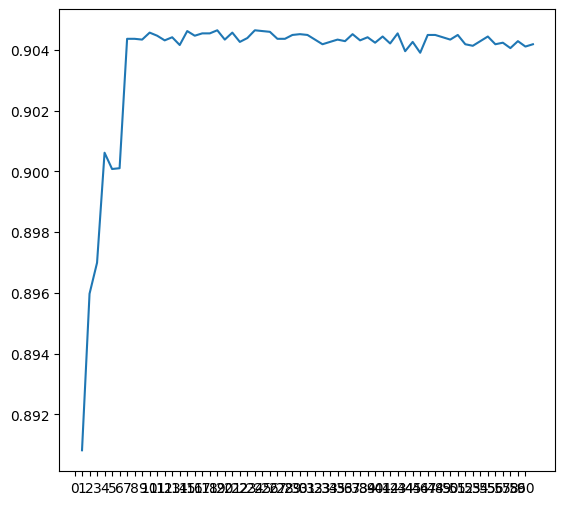

In [17]:
plt.figure().set_figwidth(13.5)
plt.figure().set_figheight(6)
plt.xticks(np.arange(0, col, step=1))
plt.plot(range(1,col+1),original)
plt.savefig('KValues_mutual.png', dpi=600)

## Standarization of values
If we look up to the ranges between the values, we can see that only a few columns have a wide range on its values, since most of the columns are boolean types. Therefore, we don't need any preprocessing or standarization.

In [18]:
for i in range(60):
    print('std:',X[:,i].std(),'min',X[:,i].min(),'max',X[:,i].max())

std: 10.28816861224553 min 17 max 98
std: 259.7252599689887 min 0 max 4918
std: 2.7720738473606157 min 1 max 56
std: 184.24269151000544 min 0 max 999
std: 0.48825225686711266 min 0 max 7
std: 1.5664821840190177 min -3.4 max 1.4
std: 0.5770423960865926 min 92.201 max 94.767
std: 4.621835748047421 min -50.8 max -26.9
std: 1.730470588844565 min 0.634 max 5.045
std: 71.78682547940478 min 4963.6 max 5228.1
std: 0.18553354814546566 min False max True
std: 0.43820528657815855 min False max True
std: 0.4170776316592573 min False max True
std: 0.1853418693052726 min False max True
std: 0.15883341992318506 min False max True
std: 0.25748174199921087 min False max True
std: 0.19888974015592514 min False max True
std: 0.1847654494015846 min False max True
std: 0.29639065058998115 min False max True
std: 0.13309552840602595 min False max True
std: 0.37240771251437005 min False max True
std: 0.156916501939839 min False max True
std: 0.3162311733126127 min False max True
std: 0.48864449535095883 min 

## Training of KNN

In [19]:
# Let's do a simple cross-validation: split data into training and test sets (test 20% of data)
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=.2, random_state=1)

knnc = nb.KNeighborsClassifier()

knnc.fit(X_train, y_train)

print(knnc.score(X_test, y_test))

0.9061104732746523


In [20]:
# Simulate a prediction
y_pred = knnc.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[6666  290]
 [ 446  437]]


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6956
           1       0.60      0.49      0.54       883

    accuracy                           0.91      7839
   macro avg       0.77      0.73      0.75      7839
weighted avg       0.90      0.91      0.90      7839



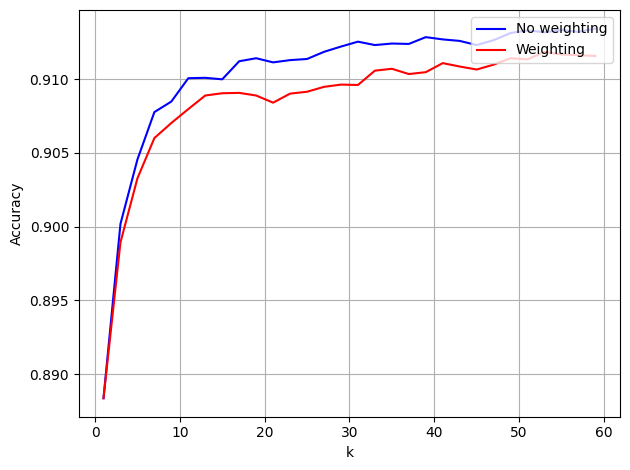

In [22]:
X_new = SelectKBest(mutual_info_classif, k=19).fit_transform(X, y)

lr = []
for ki in range(1,61,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_new, y=y, cv=cv)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,61,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,61,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_new, y=y, cv=cv)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,61,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,61,2)), 'weights':('distance','uniform')}
knnc = nb.KNeighborsClassifier()
clf = GridSearchCV(knnc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_new, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 59, 'weights': 'uniform'} Accuracy= 0.9134241476636585


/home/kmalhal/.local/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [24]:
# Build confussion matrix of all 10 cross-validations
predicted = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=59), X=X_new, y=y, cv=cv)  

print(confusion_matrix(y, predicted))
print(classification_report(y, predicted))
print(accuracy_score(y, predicted))

[[33666  1165]
 [ 2228  2132]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     34831
           1       0.65      0.49      0.56      4360

    accuracy                           0.91     39191
   macro avg       0.79      0.73      0.75     39191
weighted avg       0.91      0.91      0.91     39191

0.913424000408257


## Imbalanced data
Comparing both the models that does not select the best neighbors nor the best features and one that does select both, the scores don't get better significantly. This is probably because of the imabalance of the two classes (y = 0 and y = 1).
Due to a wide difference between the two classes, it's imperative that we fix this imbalance while doing the training. For that, we will either oversample or undersample the training data.

In [25]:
from imblearn.over_sampling import SMOTE, ADASYN
X_SMOTE,  y_SMOTE  =  SMOTE().fit_resample(X_train, y_train)
X_ADASYN, y_ADASYN = ADASYN().fit_resample(X_train, y_train)

knnc_SMOTE  = nb.KNeighborsClassifier(n_neighbors=29)
knnc_ADASYN = nb.KNeighborsClassifier(n_neighbors=29)

# Train the model with the new resampled training data
knnc_SMOTE.fit(X_SMOTE, y_SMOTE)
knnc_ADASYN.fit(X_ADASYN, y_ADASYN)

KNeighborsClassifier(n_neighbors=29)

In [26]:
y_pred = knnc_SMOTE.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[5769 1187]
 [  83  800]]


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      6956
           1       0.40      0.91      0.56       883

    accuracy                           0.84      7839
   macro avg       0.69      0.87      0.73      7839
weighted avg       0.92      0.84      0.86      7839



In [28]:
y_pred = knnc_ADASYN.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[5502 1454]
 [  55  828]]


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      6956
           1       0.36      0.94      0.52       883

    accuracy                           0.81      7839
   macro avg       0.68      0.86      0.70      7839
weighted avg       0.92      0.81      0.84      7839



### Feature selection with resampled data
The results are slightly better for the recall and accuracy. Let's try selecting the best features and neighbors with the SMOTE resmapled classifier and compare it with the default one.

In [30]:
original_SMOTE = np.zeros(col)

# Since this operation takes so much time (~5 minutes), we will do this once and save the values in a file and load from it.
if os.path.isfile('features_SMOTE.txt'):
    original_SMOTE = np.loadtxt('features_SMOTE.txt', dtype=float)
else:
    for i in range(col):
        X_new = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X_SMOTE, y_SMOTE)
        cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y_SMOTE, cv=cv, scoring='accuracy')
        original_SMOTE[i]=np.mean(cv_scores)
    np.savetxt('features_SMOTE.txt', original, fmt='%f')

In [32]:
print('Best number of features: %d (Accuracy: %f)' % (np.argmax(original_SMOTE), (np.max(original_SMOTE))))

Best number of features: 56 (Accuracy: 0.919211)


<Figure size 1350x480 with 0 Axes>

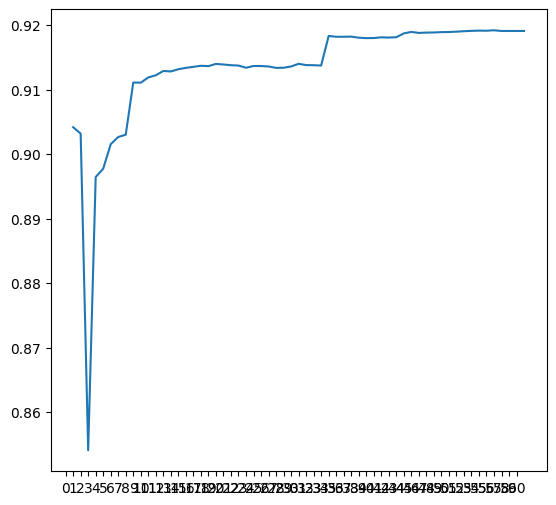

In [33]:
plt.figure().set_figwidth(13.5)
plt.figure().set_figheight(6)
plt.xticks(np.arange(0, col, step=1))
plt.rcParams['figure.figsize'] = [13.5, 6]
plt.plot(range(1,col+1),original_SMOTE)
plt.savefig('KValues_mutual_SMOTE.png', dpi=600)

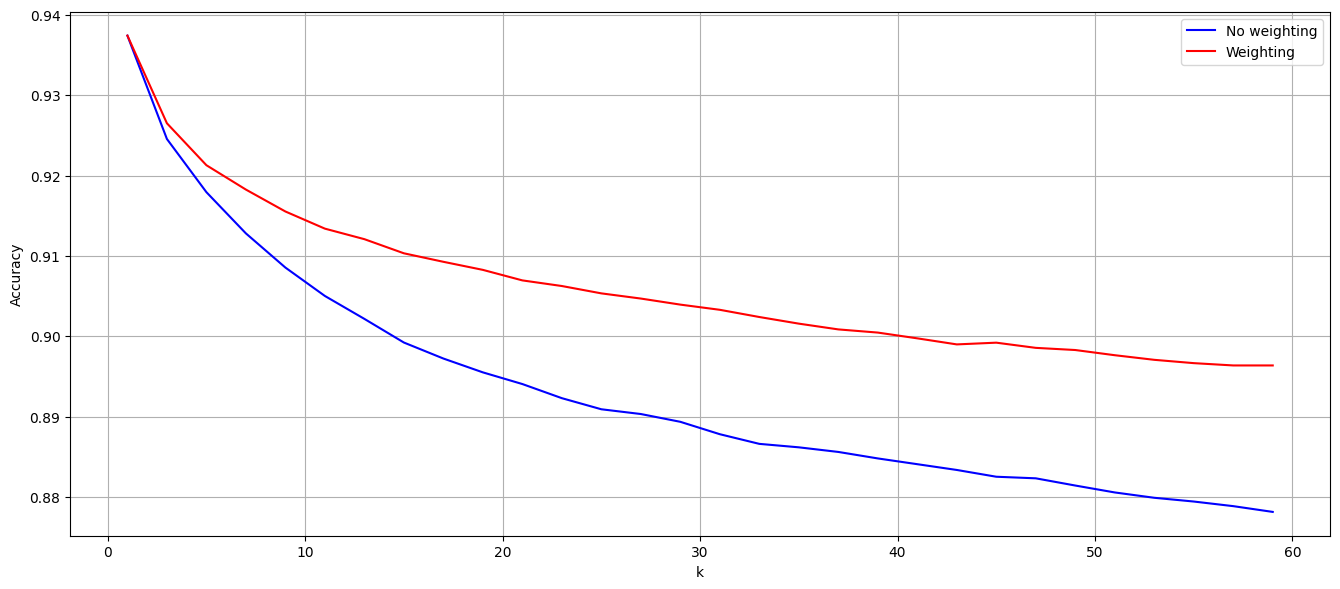

In [34]:
X_new = SelectKBest(mutual_info_classif, k=np.argmax(original_SMOTE)+1).fit_transform(X_SMOTE, y_SMOTE)

lr = []
for ki in range(1,61,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_new, y=y_SMOTE, cv=cv)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,61,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,61,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_new, y=y_SMOTE, cv=cv)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,61,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [35]:
params = {'n_neighbors':list(range(1,61,2)), 'weights':('distance','uniform')}
knnc = nb.KNeighborsClassifier()
clf = GridSearchCV(knnc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_new, y_SMOTE)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 1, 'weights': 'distance'} Accuracy= 0.9374170403587445


In [43]:
X_train_SMOTE = SelectKBest(mutual_info_classif, k=np.argmax(original_SMOTE)+1).fit_transform(X_SMOTE, y_SMOTE)
X_test_new    = SelectKBest(mutual_info_classif, k=np.argmax(original_SMOTE)+1).fit_transform(X_test, y_test)

knnc_SMOTE = nb.KNeighborsClassifier(n_neighbors=1)
knnc_SMOTE.fit(X_train_SMOTE, y_SMOTE)
y_pred = knnc_SMOTE.predict(X_test_new)

print(confusion_matrix(y_test, y_pred))

[[3947 3009]
 [ 229  654]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.57      0.71      6956
           1       0.18      0.74      0.29       883

    accuracy                           0.59      7839
   macro avg       0.56      0.65      0.50      7839
weighted avg       0.86      0.59      0.66      7839



In [40]:
predicted = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=59), X=X_new, y=y_SMOTE, cv=cv)

# print(confusion_matrix(y_test, predicted))
print(classification_report(y, predicted))
print(accuracy_score(y, predicted))

ValueError: Found input variables with inconsistent numbers of samples: [39191, 55750]